In [1]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
import numpy as np
import torch

from p3droslo.loss  import Loss
from p3droslo.model import TensorModel, SphericallySymmetric

from test_1D                  import get_model, get_obs, forward, frequencies, velocities, r_in, v_fac
from test_1D_CO_and_T_and_vel import get_initial_model, reconstruct, reconstruct2, fit2

/home/frederikd/.local/lib/python3.9/site-packages/astroquery/lamda/core.py:145: UserWarning: The first time a LAMDA function is called, it must assemble a list of valid molecules and URLs.  This list will be cached so future operations will be faster.
  warnings.warn("The first time a LAMDA function is called, it must "


You have selected line:
    CO(J=3-2)
Please check the properties that were inferred:
    Frequency         3.457959899e+11  Hz
    Einstein A coeff  2.497000000e-06  1/s
    Molar mass        28.0101          g/mol
You have selected line:
    CO(J=4-3)
Please check the properties that were inferred:
    Frequency         4.610407682e+11  Hz
    Einstein A coeff  6.126000000e-06  1/s
    Molar mass        28.0101          g/mol
You have selected line:
    CO(J=5-4)
Please check the properties that were inferred:
    Frequency         5.762679305e+11  Hz
    Einstein A coeff  1.221000000e-05  1/s
    Molar mass        28.0101          g/mol


In [2]:
test_model_name = 'models/test_model_1D.h5'
spherical_model = get_model()
spherical_model.model_1D.save(test_model_name)

In [3]:
obs = forward(spherical_model)

In [4]:
nCO_init = 25
v_in  = 1.0e+1
v_inf = 2.0e+4
beta  = 0.9
tmp_init = 1.0e+3
epsilon  = 0.85
spherical = get_initial_model(
    from_model = test_model_name,
    nCO        = nCO_init,
    v_in       = v_in,
    v_inf      = v_inf,
    beta       = beta,
    tmp        = tmp_init,
    epsilon    = epsilon
)

In [5]:
spherical.model_1D.info()

Variable key:              Free/Fixed:   Field:    Min:           Mean:          Max:
  log_CO                     Free          True     +3.219e+00     +3.219e+00     +3.219e+00
  log_temperature            Fixed         True     +7.138e+00     +7.438e+00     +8.517e+00
  log_v_turbulence           Fixed         True     +5.521e+00     +5.521e+00     +5.521e+00
  log_velocity               Fixed         True     +9.210e+00     +1.214e+01     +1.220e+01
  log_v_in                   Free          False    +2.303e+00     +2.303e+00     +2.303e+00
  log_v_inf                  Free          False    +9.903e+00     +9.903e+00     +9.903e+00
  log_beta                   Free          False    -1.054e-01     -1.054e-01     -1.054e-01
  log_T_in                   Free          False    +6.908e+00     +6.908e+00     +6.908e+00
  log_epsilon                Free          False    -1.625e-01     -1.625e-01     -1.625e-01
sizes: [1.49597871e+15]
shape: (128,)


Text(0.5, 0, 'frequency [km/s]')

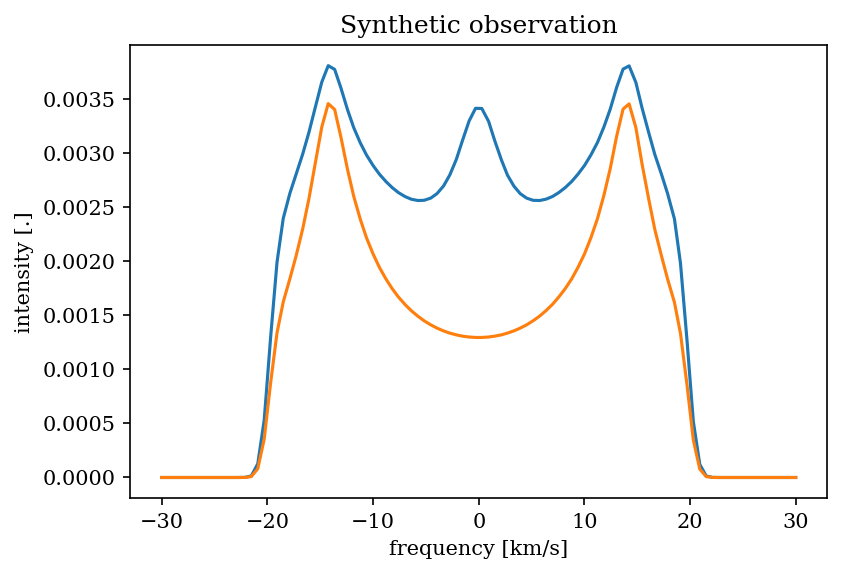

In [6]:
plt.figure(dpi=150)
plt.title("Synthetic observation")
plt.plot(velocities/1.0e+3, obs.data)
plt.plot(velocities/1.0e+3, forward(spherical).data)
plt.ylabel(r"intensity [.]")
plt.xlabel(r"frequency [km/s]")

log_v_in             2.302585092994046
log_v_inf            9.903487552536127
log_beta             -0.10536051565782628
log_T_in             6.907755278982137
log_epsilon          -0.16251892949777494


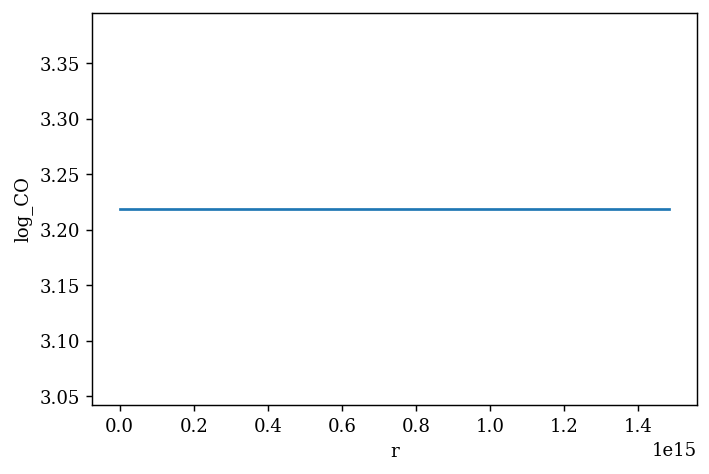

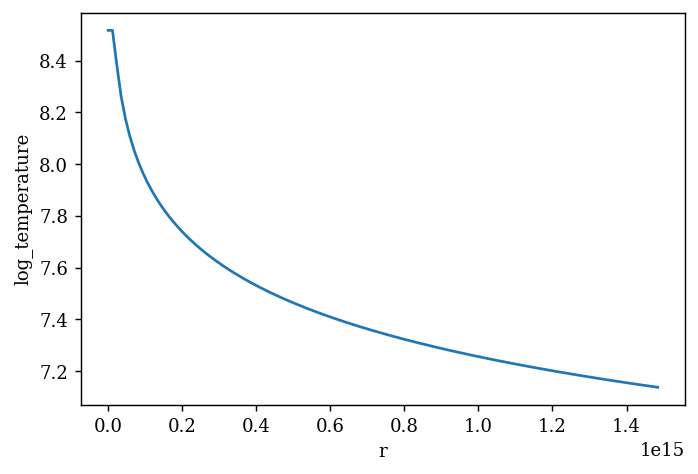

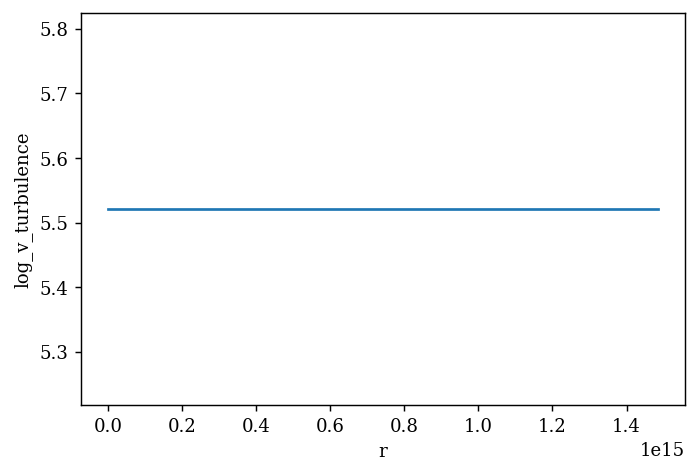

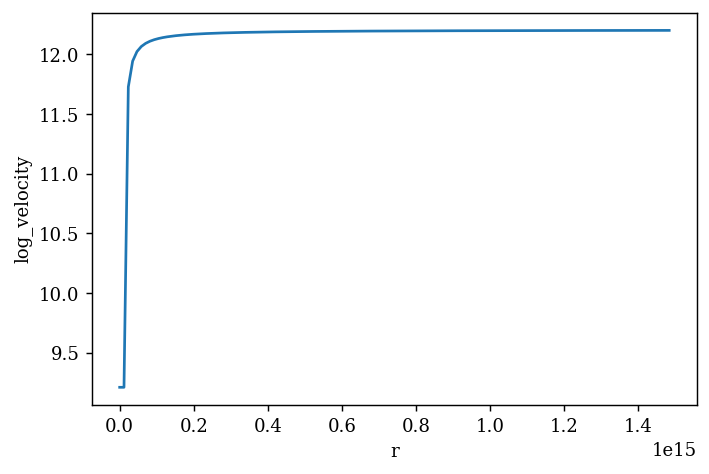

In [7]:
spherical.plot()

In [8]:
# spherical.model_1D.save('models/model_all.h5')

In [9]:
img, loss = reconstruct2(spherical, obs)

  0%|          | 0/3 [00:00<?, ?it/s]/home/frederikd/.local/lib/python3.9/site-packages/torch/autograd/__init__.py:200: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
100%|██████████| 350/350 [05:13<00:00,  1.12it/s]


In [10]:
spherical.model_1D.info()

Variable key:              Free/Fixed:   Field:    Min:           Mean:          Max:
  log_CO                     Free          True     +1.028e+00     +2.480e+00     +1.043e+01
  log_temperature            Fixed         True     +7.138e+00     +7.438e+00     +8.517e+00
  log_v_turbulence           Fixed         True     +5.521e+00     +5.521e+00     +5.521e+00
  log_velocity               Fixed         True     +9.210e+00     +1.214e+01     +1.220e+01
  log_v_in                   Free          False    +7.140e+00     +7.140e+00     +7.140e+00
  log_v_inf                  Free          False    +9.980e+00     +9.980e+00     +9.980e+00
  log_beta                   Free          False    +1.784e+00     +1.784e+00     +1.784e+00
  log_T_in                   Free          False    +5.578e+00     +5.578e+00     +5.578e+00
  log_epsilon                Free          False    -7.892e-01     -7.892e-01     -7.892e-01
sizes: [1.49597871e+15]
shape: (128,)


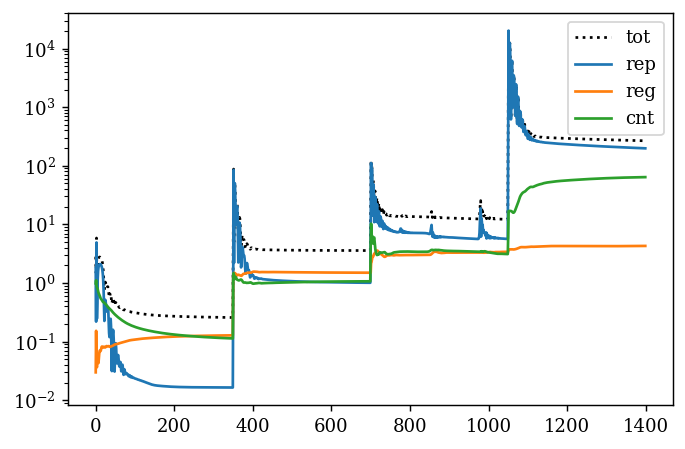

In [11]:
loss.plot()

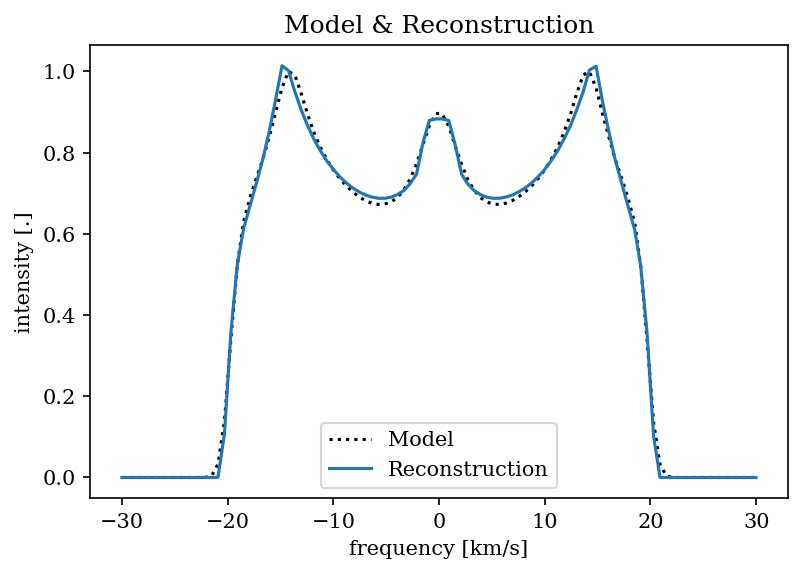

In [12]:
plt.figure(dpi=150)
plt.title("Model & Reconstruction")
plt.plot(velocities/1.0e+3, obs.data/obs.data.max(), c='k', linestyle=':', label='Model')
plt.plot(velocities/1.0e+3, img.data/obs.data.max(),                       label='Reconstruction')
plt.ylabel(r"intensity [.]")
plt.xlabel(r"frequency [km/s]")
plt.legend()

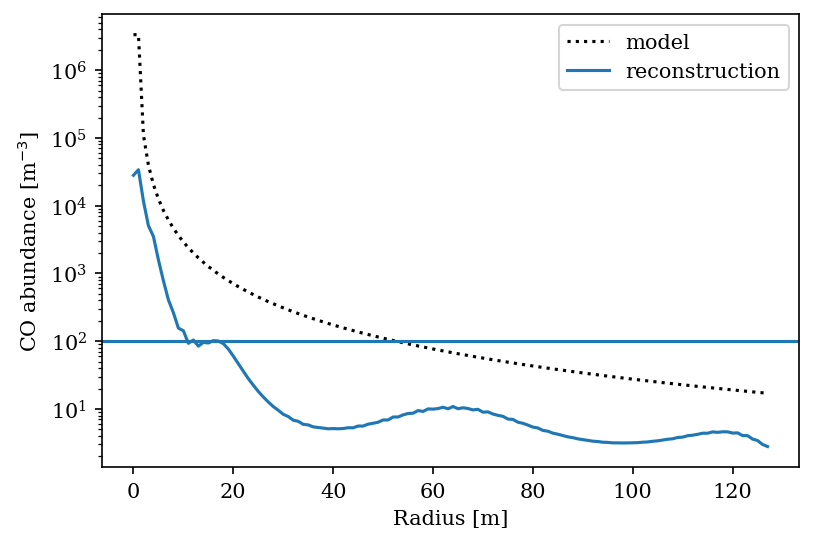

In [13]:
plt.figure(dpi=150)
plt.plot(torch.exp(spherical_model.model_1D['log_CO']).data, c='k', linestyle=':', label='model')
plt.axhline(100)
plt.plot(torch.exp(spherical.model_1D['log_CO']).data, label='reconstruction')
plt.yscale('log')
plt.ylabel('CO abundance [m$^{-3}$]')
plt.xlabel('Radius [m]')
plt.legend()

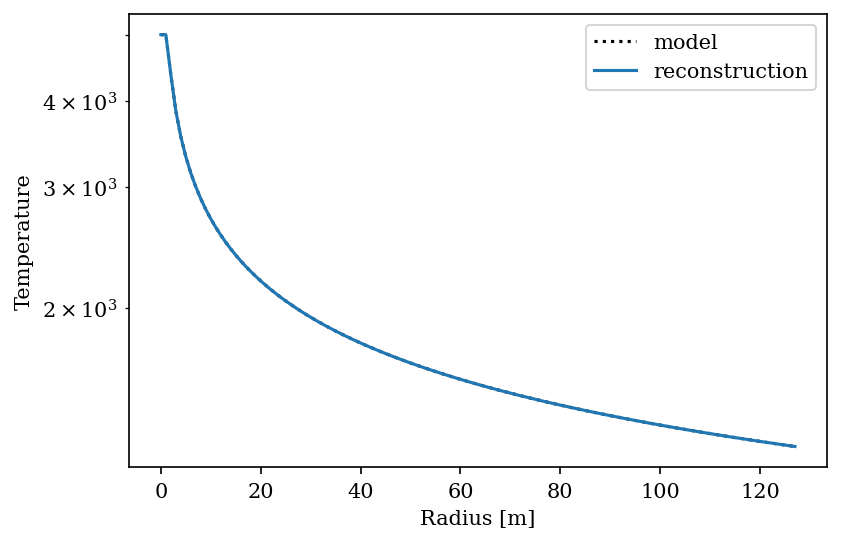

In [14]:
plt.figure(dpi=150)
plt.plot(torch.exp(spherical_model.model_1D['log_temperature']).data, c='k', linestyle=':', label='model')
plt.plot(torch.exp(spherical.model_1D['log_temperature']).data, label='reconstruction')
plt.yscale('log')
plt.ylabel('Temperature')
plt.xlabel('Radius [m]')
plt.legend()

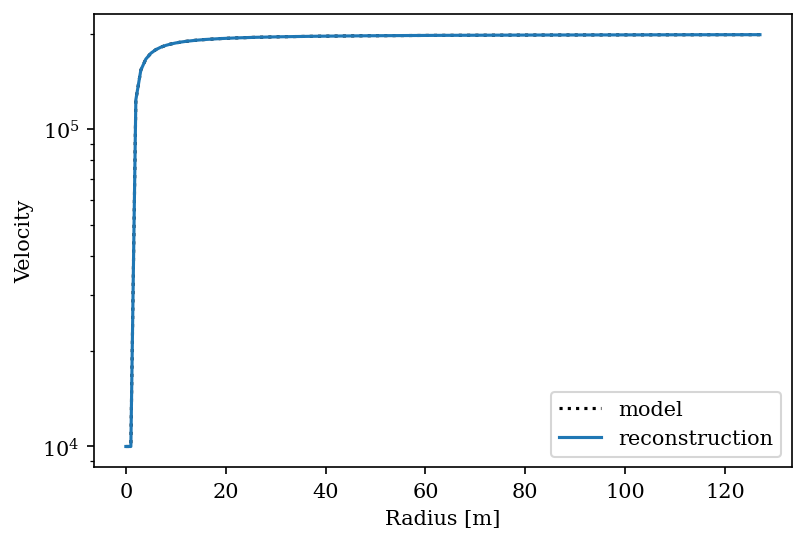

In [15]:
plt.figure(dpi=150)
plt.plot(torch.exp(spherical_model.model_1D['log_velocity']).data, c='k', linestyle=':', label='model')
plt.plot(torch.exp(spherical.model_1D['log_velocity']).data, label='reconstruction')
plt.yscale('log')
plt.ylabel('Velocity')
plt.xlabel('Radius [m]')
plt.legend()

In [16]:
spherical.model_1D.save('models/test_model_all_CO_25_beta_0.9_epsilon_0.85.h5')